# **Input Library**

In [ ]:
!pip install kmodes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import sklearn.metrics as metrics

# **Input Data**

In [ ]:
marketing_area = pd.read_csv("Dataset Penelitian.csv", index_col=0)

rasio = [marketing_area["ANGSURAN"][ind]/val * 100 for ind, val in marketing_area["SALARY"].items()]
# marketing_area["A/S X 100"] = rasio
marketing_area

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS
0,PETANI,3000000.0,DIFFERENT,6300000,1000000.0,54,344000,c) 1-30
1,PEDAGANG,5000000.0,SAME,6600000,2000000.0,47,393000,a) LANCAR
2,Pegawai Negeri Sipil,5000000.0,SAME,7000000,750000.0,35,560000,c) 1-30
3,PEDAGANG,3000000.0,DIFFERENT,4200000,NaN,25,308000,c) 1-30
4,BURUH/PRT,2500000.0,DIFFERENT,4500000,1200000.0,48,362000,c) 1-30
...,...,...,...,...,...,...,...,...
1255,SOPIR/PENGEMUDI,NaN,NaN,11100000,1000000.0,41,737000,g) PJDP
1256,JASA,NaN,NaN,13000000,NaN,25,1043000,g) PJDP
1257,PEGAWAI SWASTA,4500000.0,DIFFERENT,9800000,900000.0,27,788000,a) LANCAR
1258,JASA,4500000.0,DIFFERENT,13000000,NaN,25,1043000,d) 31-60


# **Preprossesing**

In [ ]:
marketing_area = marketing_area[marketing_area['GROUP OVERDUE DAYS'] != 'g) PJDP']

In [ ]:
columnss = ['GROUP OVERDUE DAYS', 'ANGSURAN']
for col in columnss :
  marketing_area[col] = marketing_area[col].fillna('KOSONG')
marketing_area['SPOUSE SALARY'] = marketing_area['SPOUSE SALARY'].fillna(float(0))
marketing_area.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# marketing_area['BIRTH DATE'] = marketing_area.apply(lambda x: 2021-int(x['BIRTH DATE'].split('/')[2]), axis=1)

In [ ]:
marketing_area

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS
0,PETANI,3000000.0,DIFFERENT,6300000,1000000.0,54,344000,c) 1-30
1,PEDAGANG,5000000.0,SAME,6600000,2000000.0,47,393000,a) LANCAR
2,Pegawai Negeri Sipil,5000000.0,SAME,7000000,750000.0,35,560000,c) 1-30
3,PEDAGANG,3000000.0,DIFFERENT,4200000,0.0,25,308000,c) 1-30
4,BURUH/PRT,2500000.0,DIFFERENT,4500000,1200000.0,48,362000,c) 1-30
...,...,...,...,...,...,...,...,...
1253,PEDAGANG,4000000.0,DIFFERENT,7300000,3000000.0,35,393000,a) LANCAR
1254,LAIN-LAIN,4000000.0,DIFFERENT,8700000,2000000.0,58,462000,a) LANCAR
1255,PEGAWAI SWASTA,4500000.0,DIFFERENT,9800000,900000.0,27,788000,a) LANCAR
1256,JASA,4500000.0,DIFFERENT,13000000,0.0,25,1043000,d) 31-60


# **Scalling Data**

In [ ]:
marketing_area['CUST OCCU'].unique()

array(['PETANI', 'PEDAGANG', 'Pegawai Negeri Sipil', 'BURUH/PRT', 'JASA',
       'PEGAWAI SWASTA', 'PETERNAK', 'SOPIR/PENGEMUDI', 'SENIMAN',
       'APARATUR PEMERINTAH', 'Pelajar/Mahasiswa', 'GURU/PENDIDIKAN',
       'Karyawan Swasta', 'LAIN-LAIN', 'PEGAWAI NEGERI/BUMN',
       'DOKTER/BIDAN/MANTRI', 'Wiraswasta', 'IBU RUMAH TANGGA',
       'PENEGAK HUKUM', 'PRODUKSI', 'PENDIDIKAN NON FORMAL', 'SEWA/RENT',
       'PENGRAJIN TANGAN', 'Guru (Dosen)', 'TRANSPORTASI & KOMUNIKASI',
       'KESEHATAN', 'Lain-lain', 'PENSIUNAN/PURNAWIRAWAN'], dtype=object)

In [ ]:
LAIN_LAIN=['LAIN-LAIN','Karyawan Lepas','ASISTEN PENGEMUDI','Lain-lain','HOTEL','SENIMAN','PRODUKSI','PENDIDIKAN NON FORMAL','PENGRAJIN TANGAN','Ibu Rumah Tangga','IBU RUMAH TANGGA','DOKTER/BIDAN/MANTRI','Pelajar/Mahasiswa','KESEHATAN', 'NELAYAN']
PEGAWAI_SWASTA=['Kry Swasta Tetap','BURUH/PRT','Karyawan Swasta','SOPIR/PENGEMUDI','TRANSPORTASI & KOMUNIKASI','JASA']
WIRASWASTA=['PEDAGANG','SEWA/RENT','PETERNAK','PETANI','Wiraswasta']
PNS=['Pegawai Negeri Sipil','GURU/PENDIDIKAN','PEGAWAI NEGERI/BUMN','APARATUR PEMERINTAH','Guru (Dosen)','PENSIUNAN/PURNAWIRAWAN','PENEGAK HUKUM']


colom = []
for ind, rangecolom in marketing_area['CUST OCCU'].items():
  if rangecolom in LAIN_LAIN:
    colom.append("LAIN-LAIN")
    print(rangecolom)
  elif rangecolom in PEGAWAI_SWASTA :
    colom.append("PEGAWAI SWASTA")
    print(rangecolom)
  elif rangecolom in WIRASWASTA :
    print(rangecolom)
    colom.append("WIRASWASTA")
  elif rangecolom in PNS :
    print(rangecolom)
    colom.append("PNS")    
  else :
    colom.append(rangecolom)

marketing_area['CUST OCCU'] = pd.DataFrame(colom)

PETANI
PEDAGANG
Pegawai Negeri Sipil
PEDAGANG
BURUH/PRT
JASA
PEDAGANG
JASA
JASA
JASA
PETERNAK
SOPIR/PENGEMUDI
JASA
PEDAGANG
JASA
PEDAGANG
PEDAGANG
BURUH/PRT
PETANI
SENIMAN
JASA
BURUH/PRT
PEDAGANG
PETANI
APARATUR PEMERINTAH
PEDAGANG
PETANI
PEDAGANG
JASA
JASA
PETANI
PEDAGANG
PEDAGANG
Pelajar/Mahasiswa
SOPIR/PENGEMUDI
JASA
JASA
GURU/PENDIDIKAN
PEDAGANG
PEDAGANG
PETANI
BURUH/PRT
Karyawan Swasta
BURUH/PRT
BURUH/PRT
PETERNAK
PEDAGANG
PEDAGANG
JASA
PETANI
PEDAGANG
PEDAGANG
PETANI
JASA
BURUH/PRT
LAIN-LAIN
PEDAGANG
PEDAGANG
PEDAGANG
BURUH/PRT
PEDAGANG
PEDAGANG
PEDAGANG
PETANI
BURUH/PRT
GURU/PENDIDIKAN
PEDAGANG
JASA
PETANI
PEGAWAI NEGERI/BUMN
PEDAGANG
JASA
BURUH/PRT
PEDAGANG
PEDAGANG
BURUH/PRT
JASA
PEDAGANG
BURUH/PRT
PEDAGANG
LAIN-LAIN
PEDAGANG
PEDAGANG
PEDAGANG
JASA
PEDAGANG
JASA
PEDAGANG
PEDAGANG
PETANI
JASA
LAIN-LAIN
BURUH/PRT
BURUH/PRT
JASA
JASA
PEDAGANG
PEDAGANG
SOPIR/PENGEMUDI
JASA
PEDAGANG
PETERNAK
JASA
PEGAWAI NEGERI/BUMN
PEDAGANG
PETANI
LAIN-LAIN
PETANI
PEDAGANG
PEDAGANG
PETANI
PEDAGANG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
mark_array=marketing_area.values
mark_array

array([['WIRASWASTA', 3000000.0, 'DIFFERENT', ..., 54, 344000, 'c) 1-30'],
       ['WIRASWASTA', 5000000.0, 'SAME', ..., 47, 393000, 'a) LANCAR'],
       ['PNS', 5000000.0, 'SAME', ..., 35, 560000, 'c) 1-30'],
       ...,
       ['PEGAWAI SWASTA', 4500000.0, 'DIFFERENT', ..., 27, 788000,
        'a) LANCAR'],
       ['PEGAWAI SWASTA', 4500000.0, 'DIFFERENT', ..., 25, 1043000,
        'd) 31-60'],
       ['PEGAWAI SWASTA', 4500000.0, 'DIFFERENT', ..., 27, 788000,
        'a) LANCAR']], dtype=object)

In [ ]:
mark_array[:, 1] = mark_array[:, 1].astype(float)
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)
mark_array[:, 5] = mark_array[:, 5].astype(float)
mark_array[:, 6] = mark_array[:, 6].astype(float)

# **Mencari kluster optimal**

In [ ]:
# cost = []
# count_cluster = []
# labels = []
# for cluster in range(1,10):
#   kproto = KPrototypes(n_clusters=cluster, verbose=2, max_iter=10)
#   kproto.fit_predict(mark_array, categorical=[0,2,7])
#   cost.append(kproto.cost_)
#   count_cluster.append(cluster)
#   labels.append(kproto.labels_)

In [ ]:
# np.unique(labels[-2])

In [ ]:
# df_cost = pd.DataFrame({'Cluster':count_cluster, 'Cost':cost})
# df_cost

In [ ]:
# from plotnine import *
# import plotnine

# plotnine.options.figure_size = (8, 4.8)
# (
#     ggplot(data = df_cost)+
#     geom_line(aes(x = 'Cluster',
#                   y = 'Cost'))+
#     geom_point(aes(x = 'Cluster',
#                    y = 'Cost'))+
#     geom_label(aes(x = 'Cluster',
#                    y = 'Cost',
#                    label = 'Cluster'),
#                size = 10,
#                nudge_y = 1000) +
#     labs(title = 'Optimal number of cluster with Elbow Method')+
#     xlab('Number of Clusters k')+
#     ylab('Cost')+
#     theme_minimal()
# )


In [ ]:
# df_short = marketing_area[["SALARY", "Harga Motor","SPOUSE SALARY",	"BIRTH DATE",	"ANGSURAN"]]
# df_short

In [ ]:
# len(labels[5])

In [ ]:
# for k in range(len(labels)):
#   print ("silhuotte score for k(clusters) = "+str(k+2)+" is "
#   +str(metrics.silhouette_score(df_short,labels[k],metric="euclidean",sample_size=1000,random_state=200)))

# **Analisis Cluster**

In [ ]:
marketing_area

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS,cluster
0,WIRASWASTA,3000000.0,DIFFERENT,6300000,1000000.0,54,344000,c) 1-30,4
1,WIRASWASTA,5000000.0,SAME,6600000,2000000.0,47,393000,a) LANCAR,4
2,PNS,5000000.0,SAME,7000000,750000.0,35,560000,c) 1-30,4
3,WIRASWASTA,3000000.0,DIFFERENT,4200000,0.0,25,308000,c) 1-30,1
4,PEGAWAI SWASTA,2500000.0,DIFFERENT,4500000,1200000.0,48,362000,c) 1-30,1
...,...,...,...,...,...,...,...,...,...
1253,WIRASWASTA,4000000.0,DIFFERENT,7300000,3000000.0,35,393000,a) LANCAR,4
1254,LAIN-LAIN,4000000.0,DIFFERENT,8700000,2000000.0,58,462000,a) LANCAR,3
1255,PEGAWAI SWASTA,4500000.0,DIFFERENT,9800000,900000.0,27,788000,a) LANCAR,3
1256,PEGAWAI SWASTA,4500000.0,DIFFERENT,13000000,0.0,25,1043000,d) 31-60,5


In [ ]:
max = 6 #total cluster
list_center = []#list untuk centroid
list_df_cluster = []#list dataframe tiap cluster
for i in range(2,max+1):
  print("\n"+"="*20,"Cluster",i,"="*20)
  kproto = KPrototypes(n_clusters= i, verbose=2,max_iter=10)
  clusters = kproto.fit_predict(mark_array, categorical=[0,2,7])
  cluster_dict=[]#list untuk cluster
  for c in clusters:
    cluster_dict.append(c)
  marketing_area['cluster']=cluster_dict
  a = marketing_area.copy()
  center = kproto.cluster_centroids_
  list_center.append(center) #memasukan centroid kedalam list 
  list_df_cluster.append(a)


==================== Cluster 2 ====================
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 263, ncost: 1.3889405264149614e+16
Run: 1, iteration: 2/10, moves: 129, ncost: 1.3357853174573158e+16
Run: 1, iteration: 3/10, moves: 77, ncost: 1.3153113802928994e+16
Run: 1, iteration: 4/10, moves: 22, ncost: 1.3130720297320412e+16
Run: 1, iteration: 5/10, moves: 11, ncost: 1.312664297168269e+16
Run: 1, iteration: 6/10, moves: 3, ncost: 1.3126401971188558e+16
Run: 1, iteration: 7/10, moves: 0, ncost: 1.3126401971188558e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 87, ncost: 1.3288349209972526e+16
Run: 2, iteration: 2/10, moves: 64, ncost: 1.3149743365073868e+16
Run: 2, iteration: 3/10, moves: 22, ncost: 1.3128507238774574e+16
Run: 2, iteration: 4/10, moves: 8, ncost: 1.3126503968258254e+16
Run: 2, iteration: 5/10, moves: 2, ncost: 1.3126401971188558e+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Starting iterations...
Run: 1, iteration: 1/10, moves: 356, ncost: 1.0957624489051416e+16
Run: 1, iteration: 2/10, moves: 193, ncost: 1.0204676645165592e+16
Run: 1, iteration: 3/10, moves: 91, ncost: 9987082398297240.0
Run: 1, iteration: 4/10, moves: 76, ncost: 9857564721266016.0
Run: 1, iteration: 5/10, moves: 69, ncost: 9757357381344586.0
Run: 1, iteration: 6/10, moves: 44, ncost: 9708558040673620.0
Run: 1, iteration: 7/10, moves: 40, ncost: 9670056301837442.0
Run: 1, iteration: 8/10, moves: 47, ncost: 9615557447070344.0
Run: 1, iteration: 9/10, moves: 16, ncost: 9609443338602192.0
Run: 1, iteration: 10/10, moves: 7, ncost: 9604436719005080.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 210, ncost: 1.0082662733204364e+16
Run: 2, iteration: 2/10, moves: 80, ncost: 9889658408298114.0
Run: 2, iteration: 3/10, moves: 62, ncost: 9770513985003686.0
Run: 2, iteration: 4/10, moves: 34, ncost: 9721767370627716.0
Run: 2, iterat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



==================== Cluster 4 ====================
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 326, ncost: 8351479270802776.0
Run: 1, iteration: 2/10, moves: 112, ncost: 8019781374841954.0
Run: 1, iteration: 3/10, moves: 43, ncost: 7948700193909209.0
Run: 1, iteration: 4/10, moves: 49, ncost: 7891592339591644.0
Run: 1, iteration: 5/10, moves: 31, ncost: 7850002434213844.0
Run: 1, iteration: 6/10, moves: 20, ncost: 7807321793559758.0
Run: 1, iteration: 7/10, moves: 11, ncost: 7798338659734402.0
Run: 1, iteration: 8/10, moves: 7, ncost: 7796828455727757.0
Run: 1, iteration: 9/10, moves: 4, ncost: 7796341091884208.0
Run: 1, iteration: 10/10, moves: 2, ncost: 7796089190953849.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 323, ncost: 7920253499288421.0
Run: 2, iteration: 2/10, moves: 52, ncost: 7866246489316356.0
Run: 2, iteration: 3/10, moves: 29, ncost:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



==================== Cluster 5 ====================
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 414, ncost: 9183050535082404.0
Run: 1, iteration: 2/10, moves: 241, ncost: 8452599320303662.0
Run: 1, iteration: 3/10, moves: 190, ncost: 7927614668874383.0
Run: 1, iteration: 4/10, moves: 145, ncost: 7617594371158283.0
Run: 1, iteration: 5/10, moves: 105, ncost: 7457810849891468.0
Run: 1, iteration: 6/10, moves: 97, ncost: 7345812226760216.0
Run: 1, iteration: 7/10, moves: 58, ncost: 7291165849887676.0
Run: 1, iteration: 8/10, moves: 42, ncost: 7229700807501758.0
Run: 1, iteration: 9/10, moves: 16, ncost: 7225190360162419.0
Run: 1, iteration: 10/10, moves: 12, ncost: 7220837571180316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 308, ncost: 7448081856518162.0
Run: 2, iteration: 2/10, moves: 90, ncost: 7160329180649948.0
Run: 2, iteration: 3/10, moves: 56, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



==================== Cluster 6 ====================
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 321, ncost: 6470098226580154.0
Run: 1, iteration: 2/10, moves: 146, ncost: 6269698242075988.0
Run: 1, iteration: 3/10, moves: 60, ncost: 6245824337956844.0
Run: 1, iteration: 4/10, moves: 58, ncost: 6211817149073418.0
Run: 1, iteration: 5/10, moves: 65, ncost: 6163865786333295.0
Run: 1, iteration: 6/10, moves: 44, ncost: 6135790611229187.0
Run: 1, iteration: 7/10, moves: 24, ncost: 6128081723985458.0
Run: 1, iteration: 8/10, moves: 18, ncost: 6123803483187336.0
Run: 1, iteration: 9/10, moves: 16, ncost: 6108075458434381.0
Run: 1, iteration: 10/10, moves: 4, ncost: 6107547329459800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 330, ncost: 6433220489044637.0
Run: 2, iteration: 2/10, moves: 111, ncost: 6208308860296930.0
Run: 2, iteration: 3/10, moves: 65, nco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
marketing_area

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS,cluster
0,WIRASWASTA,3000000.0,DIFFERENT,6300000,1000000.0,54,344000,c) 1-30,4
1,WIRASWASTA,5000000.0,SAME,6600000,2000000.0,47,393000,a) LANCAR,4
2,PNS,5000000.0,SAME,7000000,750000.0,35,560000,c) 1-30,4
3,WIRASWASTA,3000000.0,DIFFERENT,4200000,0.0,25,308000,c) 1-30,1
4,PEGAWAI SWASTA,2500000.0,DIFFERENT,4500000,1200000.0,48,362000,c) 1-30,1
...,...,...,...,...,...,...,...,...,...
1253,WIRASWASTA,4000000.0,DIFFERENT,7300000,3000000.0,35,393000,a) LANCAR,4
1254,LAIN-LAIN,4000000.0,DIFFERENT,8700000,2000000.0,58,462000,a) LANCAR,3
1255,PEGAWAI SWASTA,4500000.0,DIFFERENT,9800000,900000.0,27,788000,a) LANCAR,3
1256,PEGAWAI SWASTA,4500000.0,DIFFERENT,13000000,0.0,25,1043000,d) 31-60,5


In [ ]:
list_center[2-2]

array([['3405807.2009291523', '7275029.036004646', '1355923.344947735',
        '38.89430894308943', '458260.162601626', 'WIRASWASTA',
        'DIFFERENT', 'a) LANCAR'],
       ['3666498.7405541562', '14111838.79093199', '1314357.6826196474',
        '38.80856423173803', '680924.4332493703', 'WIRASWASTA',
        'DIFFERENT', 'a) LANCAR']], dtype='<U32')

# **K 2 CLUSTER**

In [ ]:
target = 2
# print(kproto.cluster_centroids_)
center = kproto.cluster_centroids_
num = list_center[target-2][:,:5]
cat = list_center[target-2][:,5:]
num
# marketing_df.columns

array([['3405807.2009291523', '7275029.036004646', '1355923.344947735',
        '38.89430894308943', '458260.162601626'],
       ['3666498.7405541562', '14111838.79093199', '1314357.6826196474',
        '38.80856423173803', '680924.4332493703']], dtype='<U32')

In [ ]:
df_num = pd.DataFrame(num, columns = ["SALARY","Harga Motor","SPOUSE SALARY","BIRTH DATE","ANGSURAN"])
df_cat = pd.DataFrame(cat, columns = ['CUST OCCU','BPKB NAME','GROUP OVERDUE DAYS'])
df_cat.join(df_num)


,CUST OCCU,BPKB NAME,GROUP OVERDUE DAYS,SALARY,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN
0,WIRASWASTA,DIFFERENT,a) LANCAR,3405807.2009291523,7275029.036004646,1355923.344947735,38.89430894308943,458260.162601626
1,WIRASWASTA,DIFFERENT,a) LANCAR,3666498.7405541562,14111838.79093199,1314357.6826196474,38.80856423173803,680924.4332493703


In [ ]:
for key, val in list_df_cluster[4].mean().iteritems():
  print(key, ':', val)

SALARY : 3488076.3116057236
Harga Motor : 9432591.414944356
SPOUSE SALARY : 1342806.041335453
BIRTH DATE : 38.86724960254372
ANGSURAN : 528528.6168521462
cluster : 3.120031796502385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


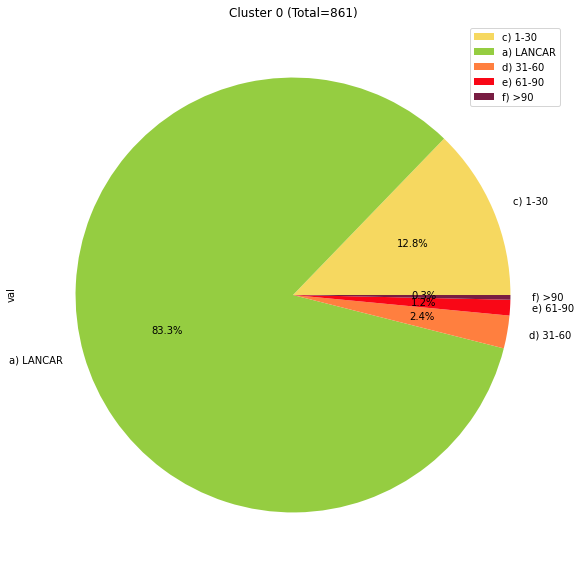

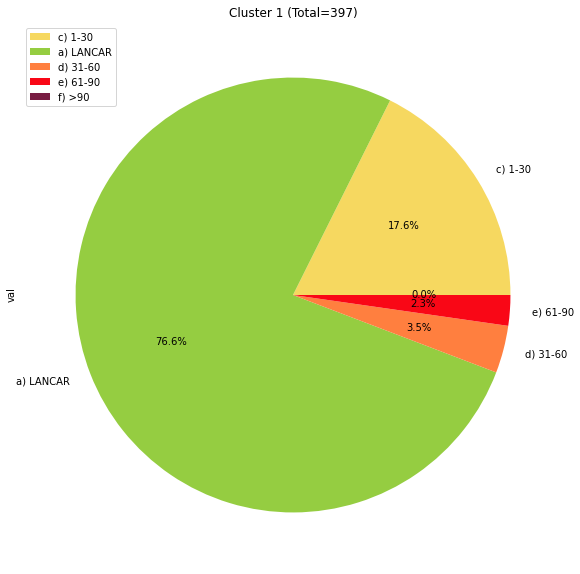

In [ ]:
target_cluster = 2

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

colourss = {
    'a) LANCAR' : '#95CD41',
    'b) SEDIKIT LANCAR' : 'black',
    'c) 1-30' : '#F6D860',
    'd) 31-60' : '#FF7F3F',
    'e) 61-90' : '#F90716',
    'f) >90' : '#781D42',
    'g) PJDP'  : 'black'
}
for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["GROUP OVERDUE DAYS"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  cust = [(int(x)/sum(cust_occu_val))*100 for x in cust_occu_val]
  dff = pd.DataFrame({'val': cust_occu_val}, index=cust_occu)
  # print(cluss)
  ax = dff.plot.pie(y='val', figsize=(10,10), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")",autopct='%1.1f%%'
  ,colors=[colourss[x] for x in list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'].unique()])
  # addlabels(cust_occu, cust)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

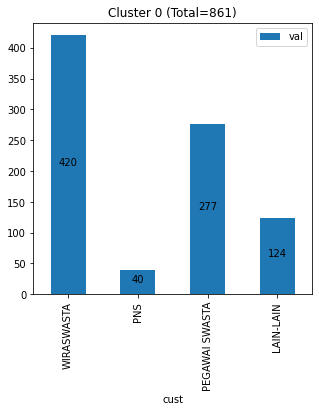

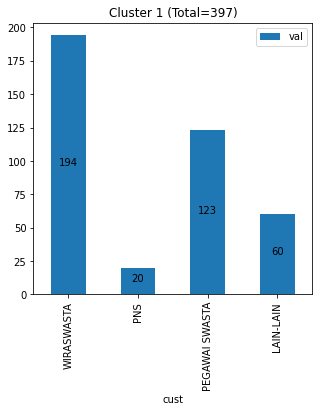

In [ ]:
target_cluster = 2

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["CUST OCCU"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['CUST OCCU'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  dff = pd.DataFrame({'cust': cust_occu, 'val':cust_occu_val})

  ax = dff.plot.bar(x='cust', y='val', figsize=(5, 5), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")")
  addlabels(cust_occu, cust_occu_val)

# **K 3 CLUSTER**

In [ ]:
target = 3
# print(kproto.cluster_centroids_)
center = kproto.cluster_centroids_
num = list_center[target-2][:,:5]
cat = list_center[target-2][:,5:]
num
# marketing_df.columns

array([['3791666.6666666665', '17686363.636363637', '1352651.5151515151',
        '39.083333333333336', '812590.9090909091'],
       ['3381833.060556465', '6315220.949263503', '1348117.8396072013',
        '38.9607201309329', '423633.38788870705'],
       ['3536310.6796116503', '11015533.980582524', '1333980.582524272',
        '38.70097087378641', '580168.9320388349']], dtype='<U32')

In [ ]:
df_num = pd.DataFrame(num, columns = ["SALARY","Harga Motor","SPOUSE SALARY","BIRTH DATE","ANGSURAN"])
df_cat = pd.DataFrame(cat, columns = ['CUST OCCU','BPKB NAME','GROUP OVERDUE DAYS'])
df_cat.join(df_num)


,CUST OCCU,BPKB NAME,GROUP OVERDUE DAYS,SALARY,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN
0,WIRASWASTA,DIFFERENT,a) LANCAR,3791666.6666666665,17686363.636363637,1352651.5151515151,39.083333333333336,812590.9090909091
1,WIRASWASTA,DIFFERENT,a) LANCAR,3381833.060556465,6315220.949263503,1348117.8396072013,38.9607201309329,423633.38788870705
2,WIRASWASTA,DIFFERENT,a) LANCAR,3536310.6796116503,11015533.980582524,1333980.582524272,38.70097087378641,580168.9320388349


In [ ]:
for key, val in list_df_cluster[4].mean().iteritems():
  print(key, ':', val)

SALARY : 3488076.3116057236
Harga Motor : 9432591.414944356
SPOUSE SALARY : 1342806.041335453
BIRTH DATE : 38.86724960254372
ANGSURAN : 528528.6168521462
cluster : 3.120031796502385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


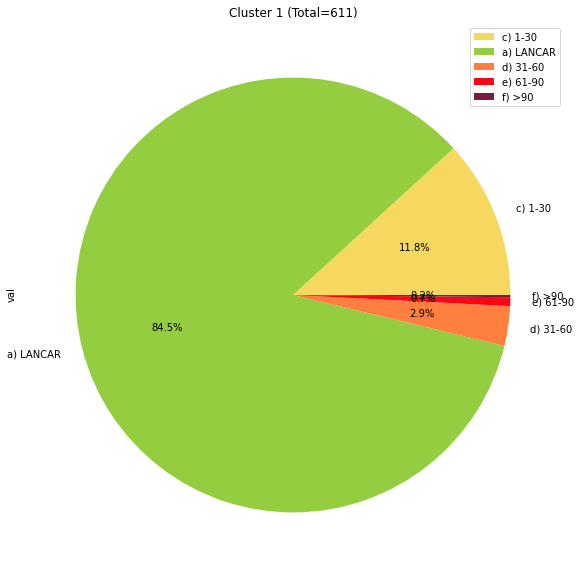

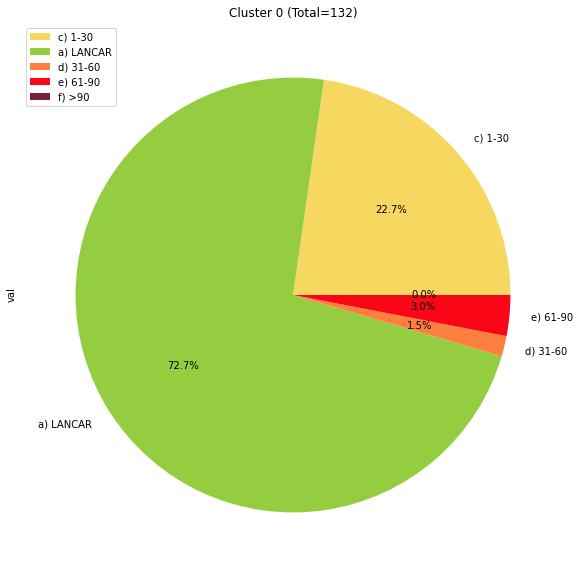

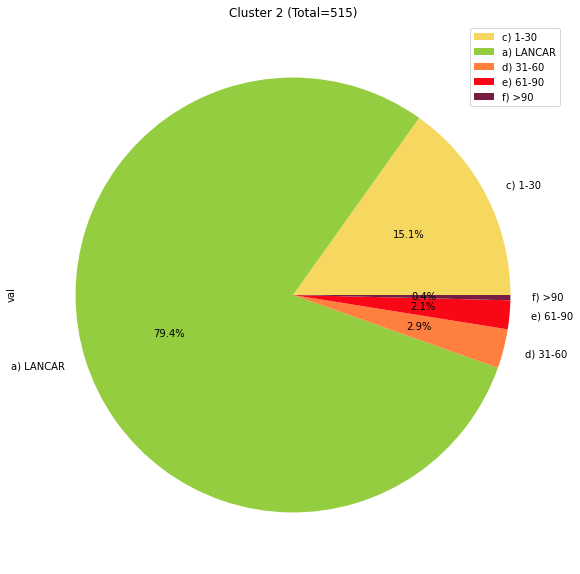

In [ ]:
target_cluster = 3

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

colourss = {
    'a) LANCAR' : '#95CD41',
    'b) SEDIKIT LANCAR' : 'black',
    'c) 1-30' : '#F6D860',
    'd) 31-60' : '#FF7F3F',
    'e) 61-90' : '#F90716',
    'f) >90' : '#781D42',
    'g) PJDP'  : 'black'
}
for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["GROUP OVERDUE DAYS"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  cust = [(int(x)/sum(cust_occu_val))*100 for x in cust_occu_val]
  dff = pd.DataFrame({'val': cust_occu_val}, index=cust_occu)
  # print(cluss)
  ax = dff.plot.pie(y='val', figsize=(10,10), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")",autopct='%1.1f%%'
  ,colors=[colourss[x] for x in list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'].unique()])
  # addlabels(cust_occu, cust)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

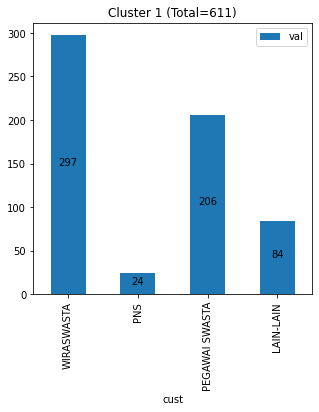

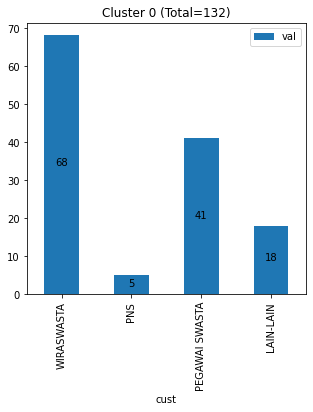

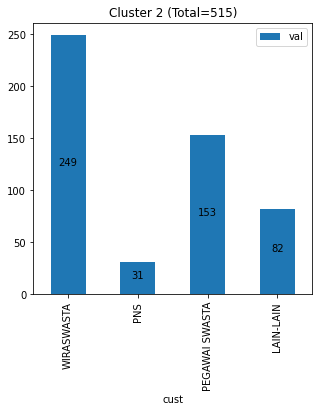

In [ ]:
target_cluster = 3

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["CUST OCCU"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['CUST OCCU'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  dff = pd.DataFrame({'cust': cust_occu, 'val':cust_occu_val})

  ax = dff.plot.bar(x='cust', y='val', figsize=(5, 5), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")")
  addlabels(cust_occu, cust_occu_val)

# **K 4 CLUSTER**

In [ ]:
target = 4
# print(kproto.cluster_centroids_)
center = kproto.cluster_centroids_
num = list_center[target-2][:,:5]
cat = list_center[target-2][:,5:]
num
# marketing_df.columns

array([['35000000.0', '8900000.0', '0.0', '30.5', '436000.0'],
       ['3788888.888888889', '17610370.37037037', '1378148.148148148',
        '39.18518518518518', '813718.5185185185'],
       ['3473469.387755102', '10867346.93877551', '1333209.6474953617',
        '38.59554730983302', '574528.7569573284'],
       ['3323539.5189003437', '6208762.886597938', '1348109.9656357388',
        '39.07388316151203', '420092.78350515466']], dtype='<U32')

In [ ]:
df_num = pd.DataFrame(num, columns = ["SALARY","Harga Motor","SPOUSE SALARY","BIRTH DATE","ANGSURAN"])
df_cat = pd.DataFrame(cat, columns = ['CUST OCCU','BPKB NAME','GROUP OVERDUE DAYS'])
df_cat.join(df_num)


,CUST OCCU,BPKB NAME,GROUP OVERDUE DAYS,SALARY,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN
0,PEGAWAI SWASTA,DIFFERENT,a) LANCAR,35000000.0,8900000.0,0.0,30.5,436000.0
1,WIRASWASTA,DIFFERENT,a) LANCAR,3788888.888888889,17610370.37037037,1378148.148148148,39.18518518518518,813718.5185185185
2,WIRASWASTA,DIFFERENT,a) LANCAR,3473469.387755102,10867346.93877551,1333209.6474953617,38.59554730983302,574528.7569573284
3,WIRASWASTA,DIFFERENT,a) LANCAR,3323539.5189003437,6208762.886597938,1348109.9656357388,39.07388316151203,420092.78350515466


In [ ]:
for key, val in list_df_cluster[4].mean().iteritems():
  print(key, ':', val)

SALARY : 3488076.3116057236
Harga Motor : 9432591.414944356
SPOUSE SALARY : 1342806.041335453
BIRTH DATE : 38.86724960254372
ANGSURAN : 528528.6168521462
cluster : 3.120031796502385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


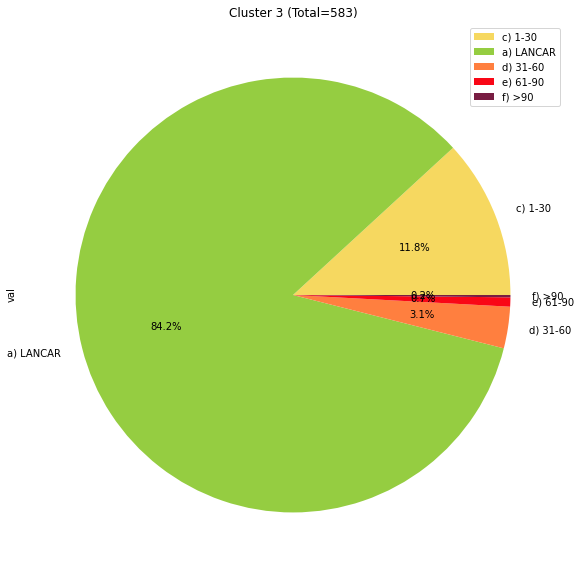

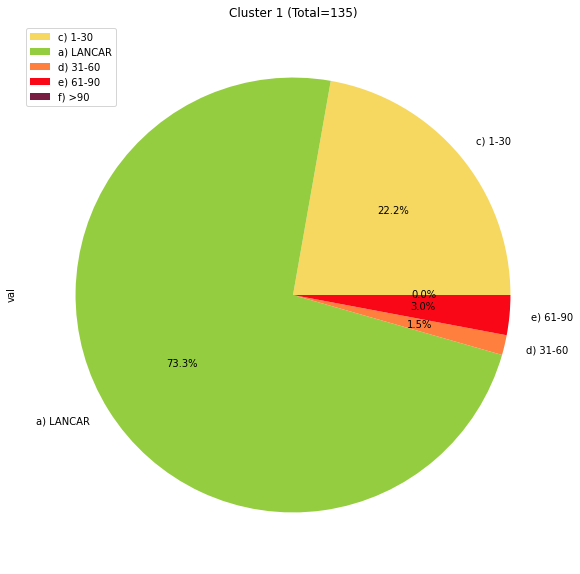

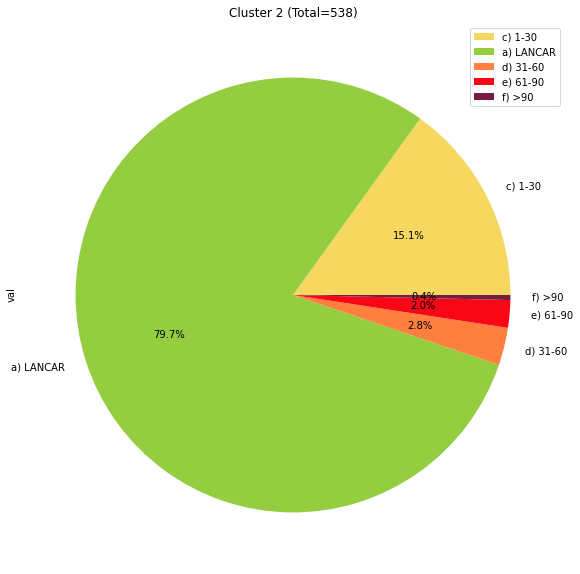

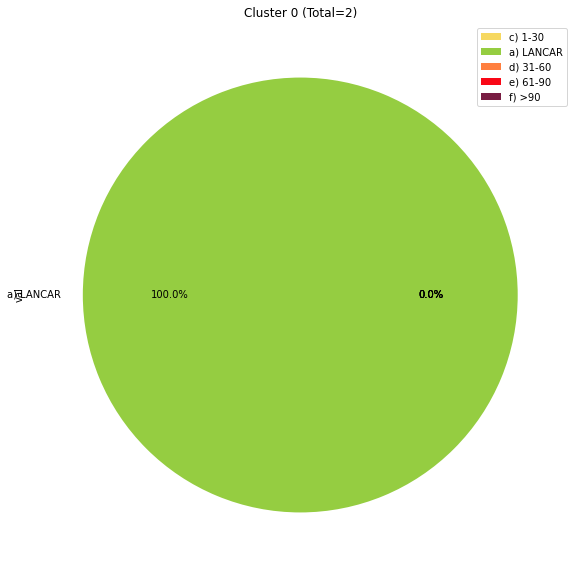

In [ ]:
target_cluster = 4

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

colourss = {
    'a) LANCAR' : '#95CD41',
    'b) SEDIKIT LANCAR' : 'black',
    'c) 1-30' : '#F6D860',
    'd) 31-60' : '#FF7F3F',
    'e) 61-90' : '#F90716',
    'f) >90' : '#781D42',
    'g) PJDP'  : 'black'
}
for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["GROUP OVERDUE DAYS"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  cust = [(int(x)/sum(cust_occu_val))*100 for x in cust_occu_val]
  dff = pd.DataFrame({'val': cust_occu_val}, index=cust_occu)
  # print(cluss)
  ax = dff.plot.pie(y='val', figsize=(10,10), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")",autopct='%1.1f%%'
  ,colors=[colourss[x] for x in list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'].unique()])
  # addlabels(cust_occu, cust)

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

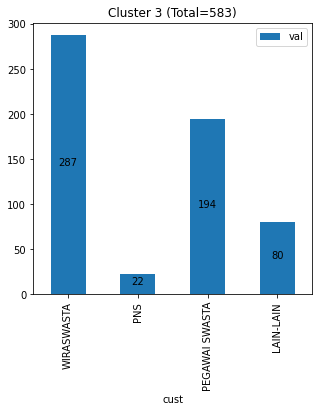

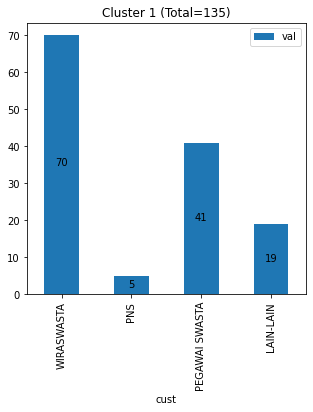

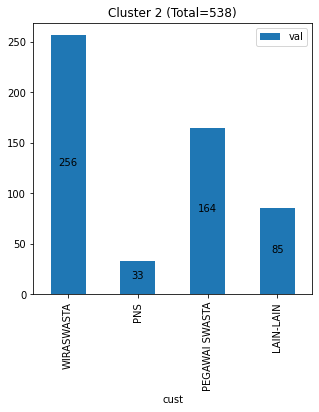

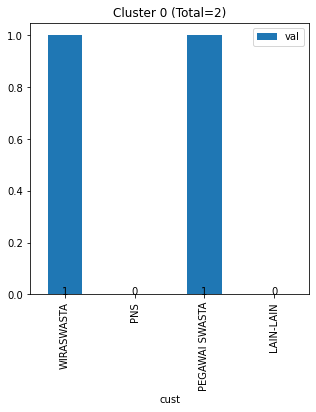

In [ ]:
target_cluster = 4

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["CUST OCCU"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['CUST OCCU'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  dff = pd.DataFrame({'cust': cust_occu, 'val':cust_occu_val})

  ax = dff.plot.bar(x='cust', y='val', figsize=(5, 5), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")")
  addlabels(cust_occu, cust_occu_val)

# **K 5 CLUSTER**

In [ ]:
target = 5
# print(kproto.cluster_centroids_)
center = kproto.cluster_centroids_
num = list_center[target-2][:,:5]
cat = list_center[target-2][:,5:]
num
# marketing_df.columns

array([['35000000.0', '8900000.0', '0.0', '30.5', '436000.0'],
       ['3249600.0', '5343200.0', '1313066.6666666667', '39.392',
        '391117.3333333333'],
       ['3506666.6666666665', '12649206.349206349', '1279523.8095238095',
        '38.7968253968254', '628136.5079365079'],
       ['3462473.7945492663', '8742767.295597484', '1393605.8700209644',
        '38.511530398322854', '509897.2746331237'],
       ['3856179.775280899', '18987640.449438203', '1450000.0', '39.0',
        '856898.8764044944']], dtype='<U32')

In [ ]:
df_num = pd.DataFrame(num, columns = ["SALARY","Harga Motor","SPOUSE SALARY","BIRTH DATE","ANGSURAN"])
df_cat = pd.DataFrame(cat, columns = ['CUST OCCU','BPKB NAME','GROUP OVERDUE DAYS'])
df_cat.join(df_num)


,CUST OCCU,BPKB NAME,GROUP OVERDUE DAYS,SALARY,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN
0,PEGAWAI SWASTA,DIFFERENT,a) LANCAR,35000000.0,8900000.0,0.0,30.5,436000.0
1,WIRASWASTA,DIFFERENT,a) LANCAR,3249600.0,5343200.0,1313066.6666666667,39.392,391117.3333333333
2,WIRASWASTA,DIFFERENT,a) LANCAR,3506666.6666666665,12649206.349206349,1279523.8095238095,38.7968253968254,628136.5079365079
3,WIRASWASTA,DIFFERENT,a) LANCAR,3462473.7945492663,8742767.295597484,1393605.8700209644,38.511530398322854,509897.2746331237
4,WIRASWASTA,DIFFERENT,a) LANCAR,3856179.775280899,18987640.449438203,1450000.0,39.0,856898.8764044944


In [ ]:
for key, val in list_df_cluster[4].mean().iteritems():
  print(key, ':', val)

SALARY : 3488076.3116057236
Harga Motor : 9432591.414944356
SPOUSE SALARY : 1342806.041335453
BIRTH DATE : 38.86724960254372
ANGSURAN : 528528.6168521462
cluster : 3.120031796502385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


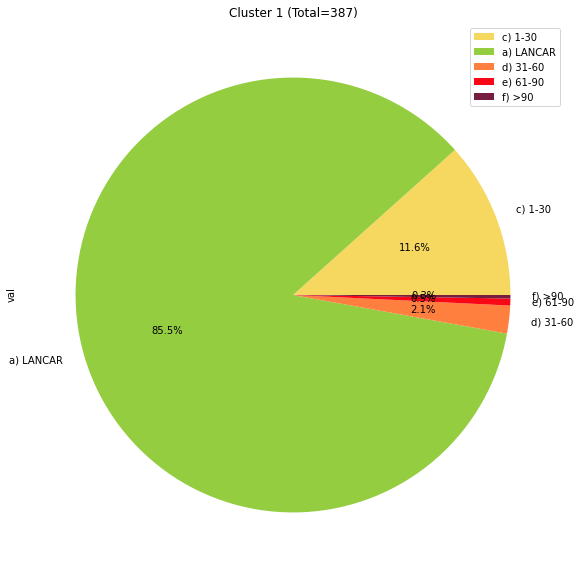

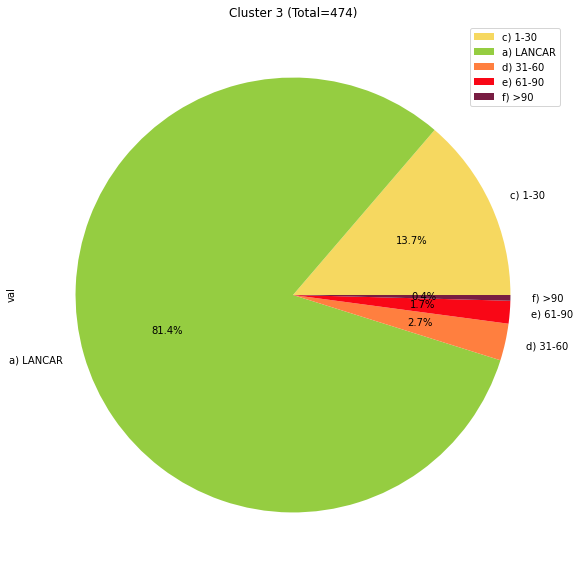

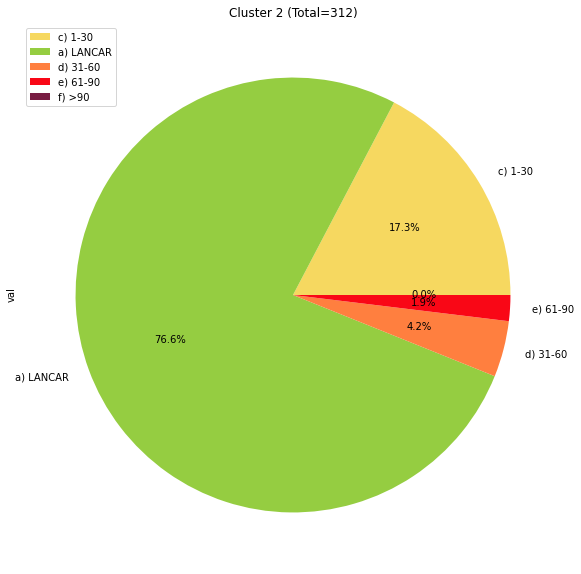

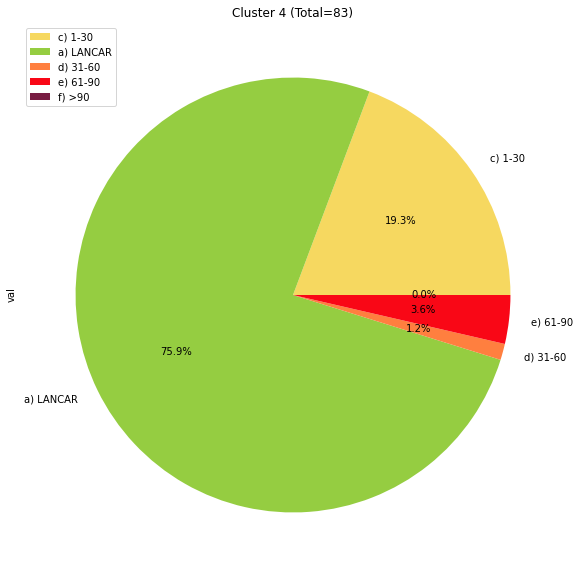

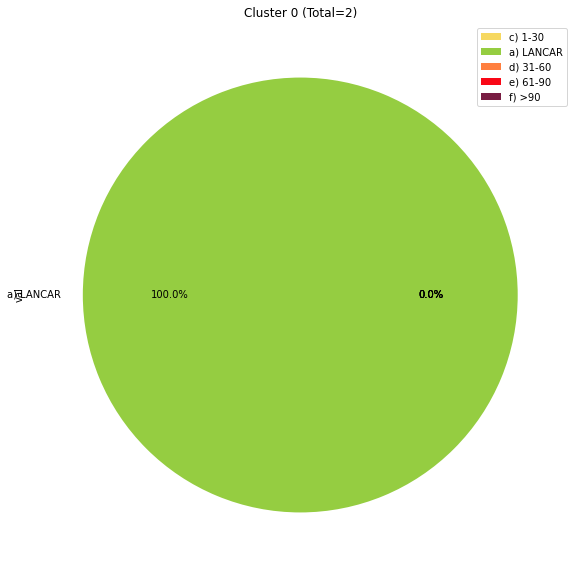

In [ ]:
target_cluster = 5

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

colourss = {
    'a) LANCAR' : '#95CD41',
    'b) SEDIKIT LANCAR' : 'black',
    'c) 1-30' : '#F6D860',
    'd) 31-60' : '#FF7F3F',
    'e) 61-90' : '#F90716',
    'f) >90' : '#781D42',
    'g) PJDP'  : 'black'
}
for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["GROUP OVERDUE DAYS"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  cust = [(int(x)/sum(cust_occu_val))*100 for x in cust_occu_val]
  dff = pd.DataFrame({'val': cust_occu_val}, index=cust_occu)
  # print(cluss)
  ax = dff.plot.pie(y='val', figsize=(10,10), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")",autopct='%1.1f%%'
  ,colors=[colourss[x] for x in list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'].unique()])
  # addlabels(cust_occu, cust)

In [ ]:
list_df_cluster[5-2][list_df_cluster[5-2]['cluster']== 2]

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS,cluster
6,WIRASWASTA,4500000.0,SAME,15200000,0.0,31,994000,c) 1-30,2
8,PEGAWAI SWASTA,3500000.0,DIFFERENT,13500000,0.0,29,520000,c) 1-30,2
9,PEGAWAI SWASTA,4000000.0,DIFFERENT,13000000,2000000.0,44,628000,c) 1-30,2
13,PEGAWAI SWASTA,3000000.0,DIFFERENT,11600000,0.0,23,588000,a) LANCAR,2
18,PEGAWAI SWASTA,4500000.0,DIFFERENT,10900000,1000000.0,49,523000,a) LANCAR,2
...,...,...,...,...,...,...,...,...,...
1230,PEGAWAI SWASTA,4000000.0,DIFFERENT,14700000,2000000.0,34,856000,a) LANCAR,2
1235,PEGAWAI SWASTA,4000000.0,DIFFERENT,12100000,0.0,28,835000,a) LANCAR,2
1241,WIRASWASTA,3000000.0,DIFFERENT,12700000,2000000.0,44,613000,a) LANCAR,2
1247,WIRASWASTA,4000000.0,SAME,14500000,0.0,41,428000,a) LANCAR,2


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

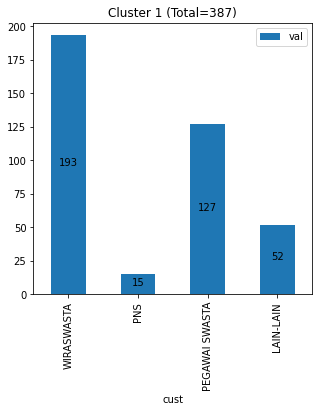

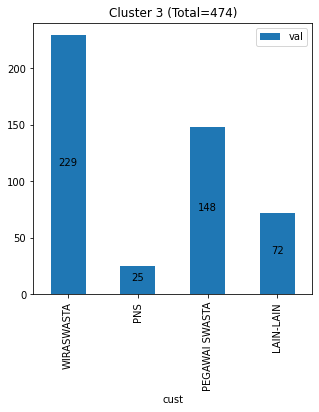

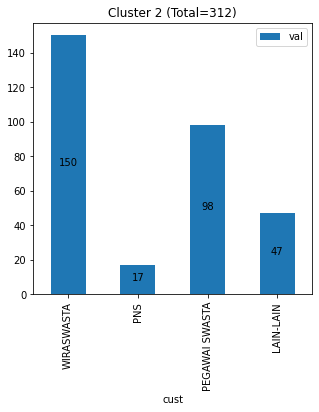

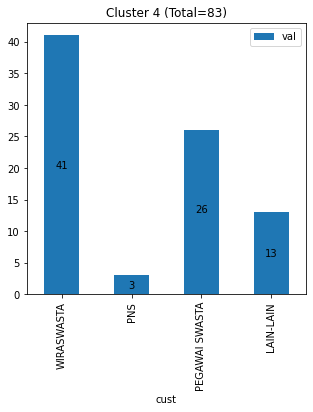

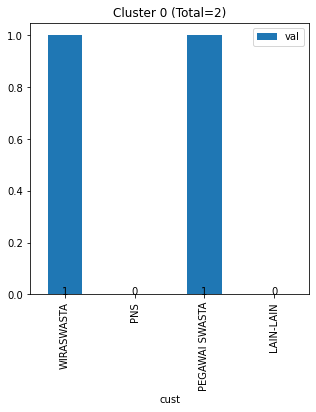

In [ ]:
target_cluster = 5

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["CUST OCCU"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['CUST OCCU'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  dff = pd.DataFrame({'cust': cust_occu, 'val':cust_occu_val})

  ax = dff.plot.bar(x='cust', y='val', figsize=(5, 5), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")")
  addlabels(cust_occu, cust_occu_val)

# **K 6 CLUSTER**

In [ ]:
target = 6
# print(kproto.cluster_centroids_)
center = kproto.cluster_centroids_
num = list_center[target-2][:,:5]
cat = list_center[target-2][:,5:]
num
# marketing_df.columns

array([['4020454.5454545454', '21588636.363636363', '1254545.4545454546',
        '36.75', '982772.7272727273'],
       ['3176140.350877193', '4970175.438596491', '1476140.350877193',
        '40.01754385964912', '376624.56140350876'],
       ['35000000.0', '8900000.0', '0.0', '30.5', '436000.0'],
       ['3462361.111111111', '9929722.222222222', '1571805.5555555555',
        '39.00555555555555', '547100.0'],
       ['3463787.3754152823', '7431229.235880399', '1046511.6279069767',
        '38.096345514950166', '463066.4451827243'],
       ['3559586.4661654136', '13798872.180451129', '1250000.0',
        '38.733082706766915', '665781.9548872181']], dtype='<U32')

In [ ]:
df_num = pd.DataFrame(num, columns = ["SALARY","Harga Motor","SPOUSE SALARY","BIRTH DATE","ANGSURAN"])
df_cat = pd.DataFrame(cat, columns = ['CUST OCCU','BPKB NAME','GROUP OVERDUE DAYS'])
df_cat.join(df_num)


,CUST OCCU,BPKB NAME,GROUP OVERDUE DAYS,SALARY,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN
0,PEGAWAI SWASTA,DIFFERENT,a) LANCAR,4020454.5454545454,21588636.363636363,1254545.4545454546,36.75,982772.7272727273
1,WIRASWASTA,DIFFERENT,a) LANCAR,3176140.350877193,4970175.438596491,1476140.350877193,40.01754385964912,376624.56140350876
2,PEGAWAI SWASTA,DIFFERENT,a) LANCAR,35000000.0,8900000.0,0.0,30.5,436000.0
3,WIRASWASTA,DIFFERENT,a) LANCAR,3462361.111111111,9929722.222222222,1571805.5555555555,39.00555555555555,547100.0
4,WIRASWASTA,DIFFERENT,a) LANCAR,3463787.3754152823,7431229.235880399,1046511.6279069767,38.096345514950166,463066.4451827243
5,WIRASWASTA,DIFFERENT,a) LANCAR,3559586.4661654136,13798872.180451129,1250000.0,38.733082706766915,665781.9548872181


In [ ]:
for key, val in list_df_cluster[4].mean().iteritems():
  print(key, ':', val)

SALARY : 3488076.3116057236
Harga Motor : 9432591.414944356
SPOUSE SALARY : 1342806.041335453
BIRTH DATE : 38.86724960254372
ANGSURAN : 528528.6168521462
cluster : 3.120031796502385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


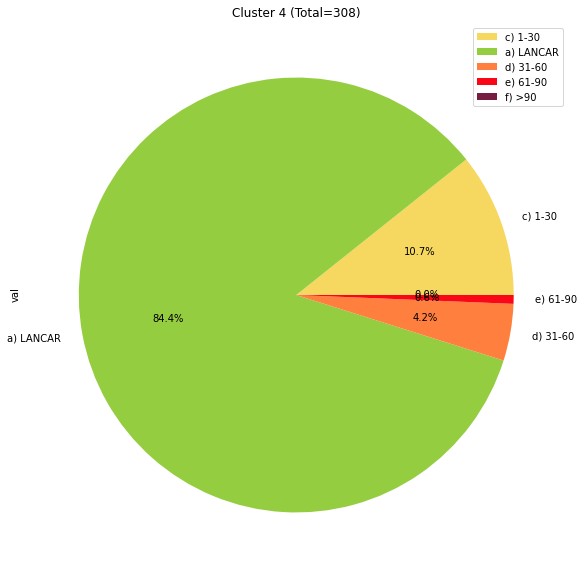

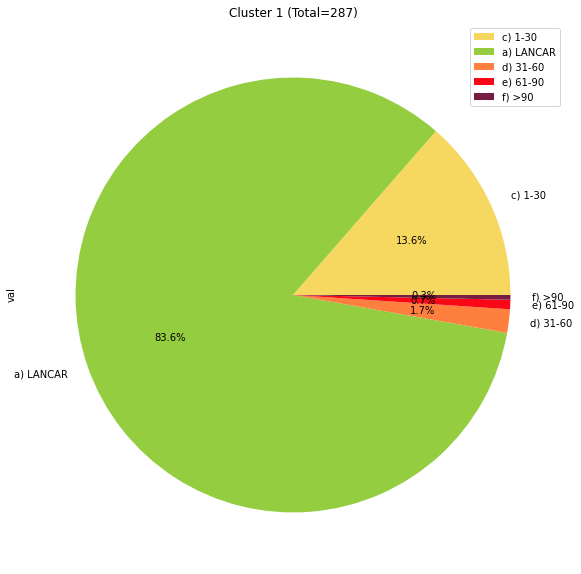

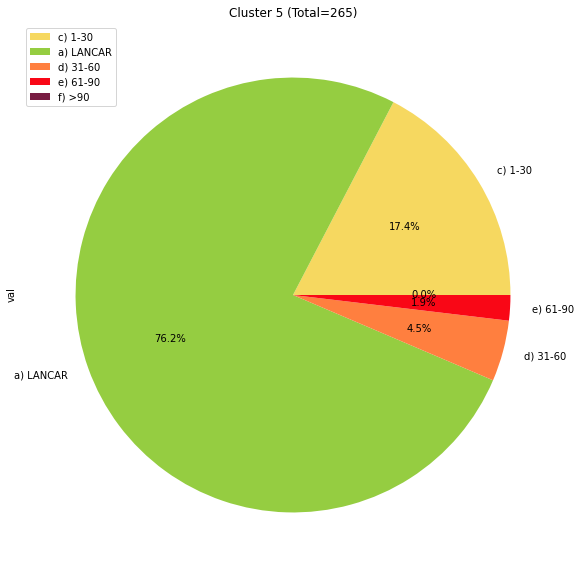

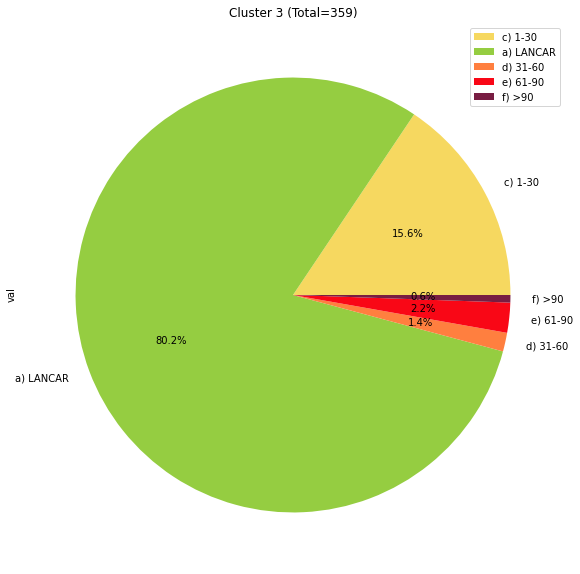

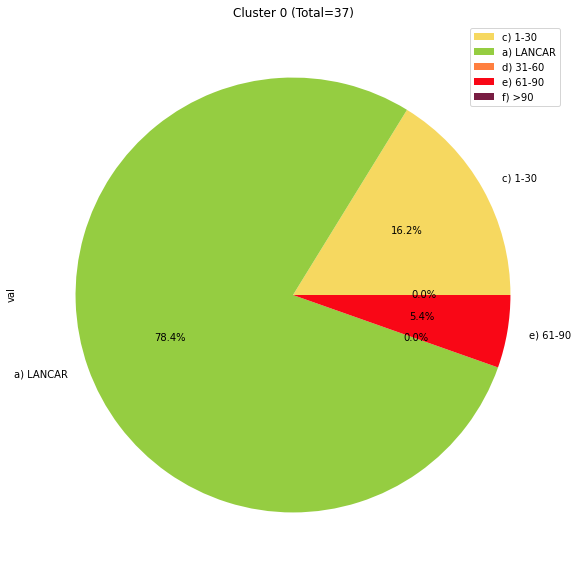

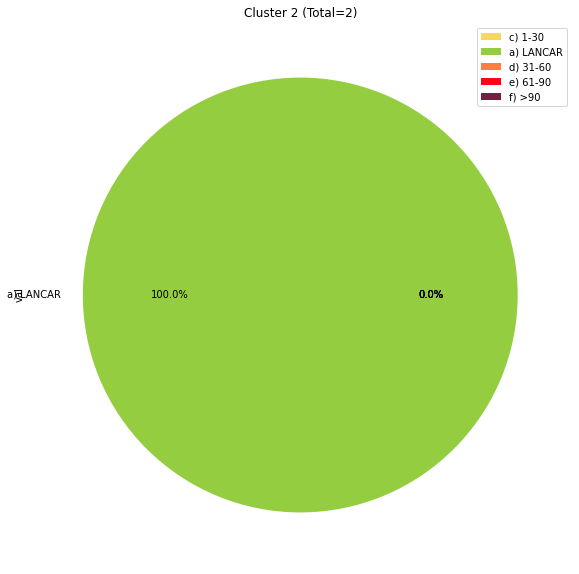

In [ ]:
target_cluster = 6

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

colourss = {
    'a) LANCAR' : '#95CD41',
    'b) SEDIKIT LANCAR' : 'black',
    'c) 1-30' : '#F6D860',
    'd) 31-60' : '#FF7F3F',
    'e) 61-90' : '#F90716',
    'f) >90' : '#781D42',
    'g) PJDP'  : 'black'
}
for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["GROUP OVERDUE DAYS"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  cust = [(int(x)/sum(cust_occu_val))*100 for x in cust_occu_val]
  dff = pd.DataFrame({'val': cust_occu_val}, index=cust_occu)
  # print(cluss)
  ax = dff.plot.pie(y='val', figsize=(10,10), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")",autopct='%1.1f%%'
  ,colors=[colourss[x] for x in list_df_cluster[target_cluster-2]['GROUP OVERDUE DAYS'].unique()])
  # addlabels(cust_occu, cust)

In [ ]:

list_df_cluster[6-2][list_df_cluster[6-2]['cluster']== 3]

,CUST OCCU,SALARY,BPKB NAME,Harga Motor,SPOUSE SALARY,BIRTH DATE,ANGSURAN,GROUP OVERDUE DAYS,cluster
10,PEGAWAI SWASTA,6000000.0,DIFFERENT,8800000,1000000.0,26,475000,a) LANCAR,3
13,PEGAWAI SWASTA,3000000.0,DIFFERENT,11600000,0.0,23,588000,a) LANCAR,3
14,PEGAWAI SWASTA,4000000.0,DIFFERENT,10500000,1000000.0,42,651000,a) LANCAR,3
17,PEGAWAI SWASTA,4500000.0,DIFFERENT,9000000,0.0,29,629000,a) LANCAR,3
18,PEGAWAI SWASTA,4500000.0,DIFFERENT,10900000,1000000.0,49,523000,a) LANCAR,3
...,...,...,...,...,...,...,...,...,...
1251,LAIN-LAIN,4000000.0,DIFFERENT,10500000,0.0,24,629000,a) LANCAR,3
1252,WIRASWASTA,4000000.0,DIFFERENT,9800000,2000000.0,49,503000,a) LANCAR,3
1254,LAIN-LAIN,4000000.0,DIFFERENT,8700000,2000000.0,58,462000,a) LANCAR,3
1255,PEGAWAI SWASTA,4500000.0,DIFFERENT,9800000,900000.0,27,788000,a) LANCAR,3


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

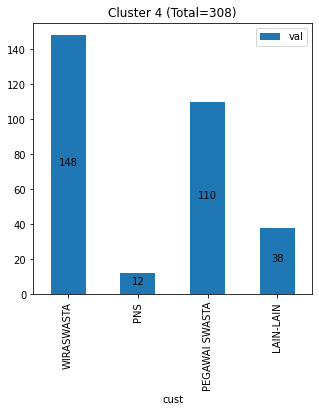

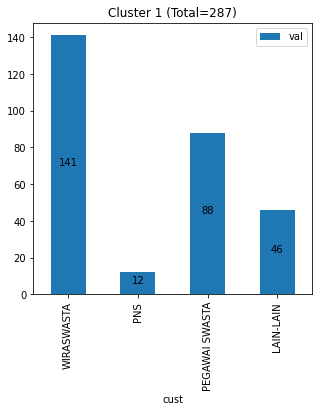

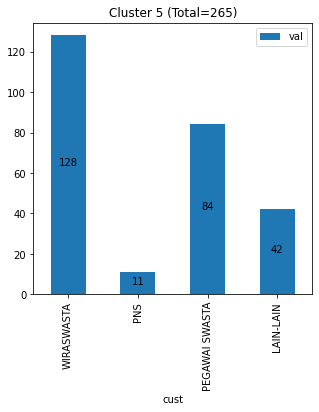

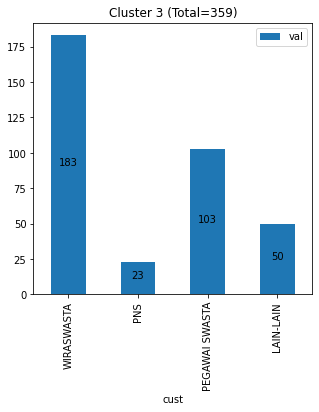

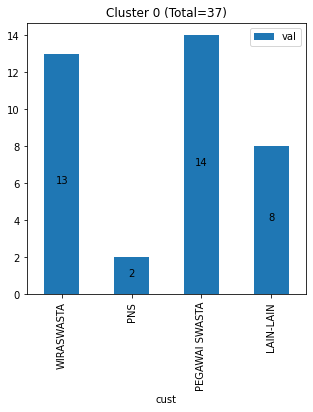

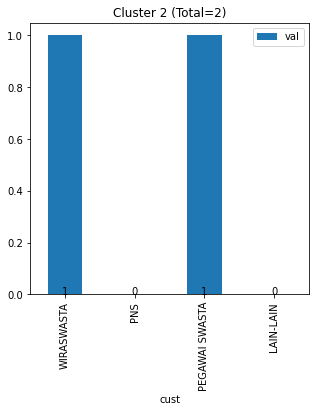

In [ ]:
target_cluster = 6

clusterr = list_df_cluster[target_cluster-2]['cluster'].unique()

for cluss in clusterr :
  cust_occu = [a for a in list_df_cluster[target_cluster-2]["CUST OCCU"].unique()]
  cust_occu_val = [len(list_df_cluster[target_cluster-2][(list_df_cluster[target_cluster-2]['CUST OCCU'] == a) & (list_df_cluster[target_cluster-2]['cluster'] == cluss)]) for a in cust_occu]
  dff = pd.DataFrame({'cust': cust_occu, 'val':cust_occu_val})

  ax = dff.plot.bar(x='cust', y='val', figsize=(5, 5), title="Cluster "+str(cluss) + " (Total=" +str(sum(cust_occu_val))+")")
  addlabels(cust_occu, cust_occu_val)

In [ ]:
from google.colab import files
# list_df_cluster.remove(list_df_cluster[0])
for ind, lis in enumerate(list_df_cluster):
  lis.to_csv(str(ind+2)+'_cluster.csv')
  files.download(str(ind+2)+'_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>